In [2]:
from scipy.io import wavfile
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fftshift
import sys

sys.path.append('/Users/kevinbrennan/Desktop/Final Project/Python Tests/Reverb (Python)/Comb Filter Reverberator')

#KYW inst
#fs, data = wavfile.read('/Users/kevinbrennan/Desktop/Final Project/Music-Technology-Final-Project/Sound Examples/KYW Inst.wav')
#ATF Drums
fs, data = wavfile.read('/Users/kevinbrennan/Desktop/Final Project/Music-Technology-Final-Project/Sound Examples/Around the fur drums.wav')

# Get the bit depth of the audio data (assumes audio_data is a NumPy array)
bit_depth = data.dtype.itemsize * 8

# Calculate the scaling factor for normalization
scaling_factor = 2 ** (bit_depth - 1)  # For signed audio

# Convert audio data to floating-point values and normalize
data = data.astype(np.float32) / scaling_factor

# Verify that the data is now in the range -1 to 1
print(f"Min Value: {np.min(data)}")
print(f"Max Value: {np.max(data)}")

Min Value: -1.0
Max Value: 0.999969482421875


In [7]:
# One Pole Low Pass Filter
corner_freq = 1000

theta_c = 2 * np.pi * (corner_freq/fs)

gamma = 2 - np.cos(theta_c)

# Coefficients
b1 = np.sqrt(pow(gamma, 2) - 1) - gamma

a0 = 1 + b1

num = [a0]
den = [1,b1]

w1, H1 = signal.freqz(num, den)

In [21]:
# Second order filter from W3

# Variables
w0 = 2 * np.pi * (corner_freq / fs)

Q = 0.7

cos_w0 = np.cos(w0)

sin_w0 = np.sin(w0)

alpha = (sin_w0) / (2 * Q)


# Coefficients

b0_2 = (1 - cos_w0) / 2

b1_2 = (1 - cos_w0)

b2_2 = (1 - cos_w0) / 2

a0_2 = 1 + alpha

a1_2 = -2 * cos_w0

a2_2 = 1 - alpha

num = [b0_2, b1_2, b2_2]
den = [a0_2, a1_2, a2_2]

w2, H2 = signal.freqz(num, den)


In [15]:
# Third order low pass using butterworth

b_3, a_3 = signal.butter(3, corner_freq, 'low', fs=fs)

w3, H3 = signal.freqz(b_3, a_3)

In [23]:
# Fourth order low pass using butterworth

b_4, a_4 = signal.butter(4, corner_freq, 'low', fs=fs)

w4, H4 = signal.freqz(b_4, a_4)


In [26]:
# Fifth order low pass using butterworth

b_5, a_5 = signal.butter(5, corner_freq, 'low', fs=fs)

w5, H5 = signal.freqz(b_5, a_5)

/var/folders/wl/6gyc0yz53snb8mbsbvf6rnh80000gn/T/ipykernel_78917/628662713.py:25: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0, fs/2])  # Set x-axis limits
/var/folders/wl/6gyc0yz53snb8mbsbvf6rnh80000gn/T/ipykernel_78917/628662713.py:41: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0, fs/2])  # Set x-axis limits


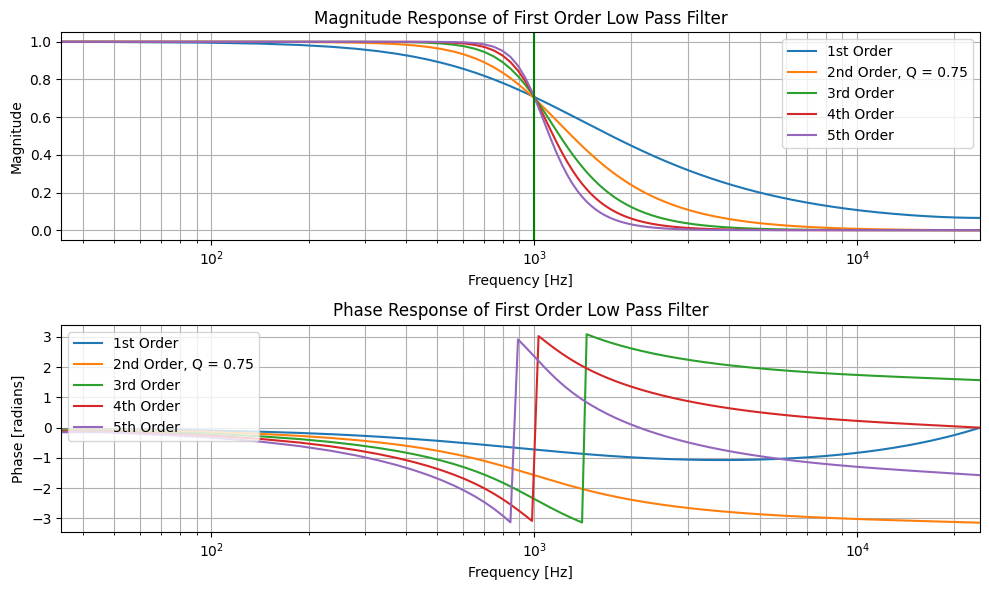

In [28]:
# Convert frequencies to Hz
freq_hz_1p = w1 * (fs / (2 * np.pi))

freq_hz_2p = w2 * (fs / (2 * np.pi))

freq_hz_3p = w3 * (fs / (2 * np.pi))

freq_hz_4p = w4 * (fs / (2 * np.pi))

freq_hz_5p = w5 * (fs / (2 * np.pi))

# Plot magnitude and phase responses in Hz
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(freq_hz_1p, np.abs(H1), label='1st Order')
plt.plot(freq_hz_2p, np.abs(H2), label='2nd Order, Q = 0.75')
plt.plot(freq_hz_3p, np.abs(H3), label='3rd Order')
plt.plot(freq_hz_4p, np.abs(H4), label='4th Order')
plt.plot(freq_hz_5p, np.abs(H5), label='5th Order')
plt.title('Magnitude Response of First Order Low Pass Filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(which='both')
plt.xscale('log')  # Set x-axis to a logarithmic scale
plt.xlim([0, fs/2])  # Set x-axis limits
plt.axvline(corner_freq, color='green')
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(freq_hz_1p, np.angle(H1), label='1st Order')
plt.plot(freq_hz_2p, np.angle(H2), label='2nd Order, Q = 0.75')
plt.plot(freq_hz_3p, np.angle(H3), label='3rd Order')
plt.plot(freq_hz_4p, np.angle(H4), label='4th Order')
plt.plot(freq_hz_5p, np.angle(H5), label='5th Order')
plt.title('Phase Response of First Order Low Pass Filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [radians]')
plt.grid(which='both')
plt.xscale('log')  # Set x-axis to a logarithmic scale
plt.xlim([0, fs/2])  # Set x-axis limits
plt.legend()


plt.tight_layout()
plt.show()

In [9]:
data_filtL = signal.lfilter(num, den, data[:,0])
data_filtR = signal.lfilter(num, den, data[:,1])

stereoFiltered = np.vstack((data_filtL, data_filtR))
stereoFiltered = np.transpose(stereoFiltered) 

In [10]:
sd.play(stereoFiltered, fs)